<a href="https://colab.research.google.com/github/StacyMwende/TitanicTragedy_Survival_Prediction/blob/master/Titanic_survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Predict the chance of survival from the provided titanic dataset

### b) Defining the Metric for Success

> A good model will enable better predictions and understanding of the dataset to the point where one is need to provide insights about the study

### d) Recording the Experimental Design


For our analysis, i will use CRISP-DM methodology which involves:

a) Business Understanding

b) Data Understanding

c) Data Preparation

d) Modeling

e) Evaluation

f) Deployment

## 2. Reading the Data

In [0]:
# Importing necessary libraries
import pandas as pd
import numpy as np
# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [0]:
# Loading the dataset
df= pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Column Description**

> survival (0 = No, 1 = Yes)

> pclass - 	Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)

> sex

> Age	- Age in years	

> sibsp -	# of siblings / spouses aboard the Titanic	

> parch	- # of parents / children aboard the Titanic	

> ticket - Ticket number	

> fare - Passenger fare	

> cabin -	Cabin number	

> embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)



## 3. Checking the Data

In [0]:
# Determining the no. of records in our dataset
# 
print('Number of records in titanic_train data: ' + str(df.shape))


Number of records in titanic_train data: (891, 12)


> We have 891 entries and 12 variables

In [0]:
# Checking datatype of each column
#
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

> Most features have the desired datatype.

> I will encode sex and Embarked columns which will automatically transform it to integers

## 4. External Data Source Validation

> Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

>> The data provided for analysis was appropriate and the column description was understandable hence making it easy to analyze the data and answer the main question in place. [Link](https://www.kaggle.com/c/titanic/data).

## 5. Tidying the Dataset

**Changing categorical data to integer by encoding**

In [0]:
# Changing the dataset for specific columns
# importing the library in use
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = df['Embarked'].replace({'S':0, 'C':1, 'Q':2})

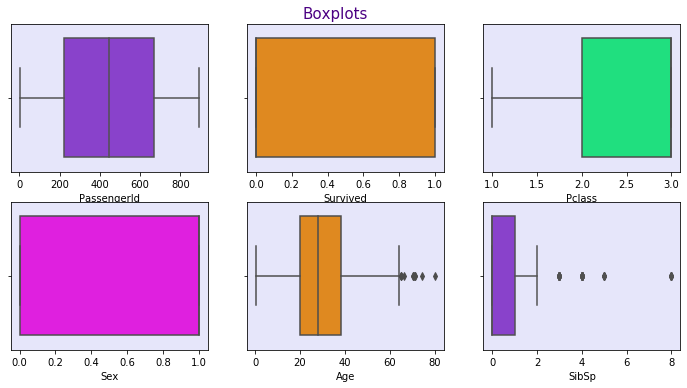

In [0]:
# Checking for Outliers
#Use Boxplots to check for outliers
# Creating a list of columns  from which we will check for outliers
#
col_list = ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']
colors = ['blueviolet', 'darkorange', 'springgreen','fuchsia', 'darkorange', 'blueviolet', 'springgreen']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 6))
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), df, col_list, colors):
  sns.boxplot(df[column], ax = ax, color = color)
  ax.set_facecolor('lavender') # Setting the background color to lavender

> We observe that the Age and Sibsp (# of siblings / spouses aboard the Titanic) column have outliers.

In [0]:
# Checking for Anomalies
#Checking for duplicates in the dataset
# 
print(df.duplicated().any())

# If any, print the sum of duplicates
print(df.duplicated().sum())

False
0


> There are no duplicates in the dataset hence we continue with our analysis

In [0]:
# Identifying the Missing Data
#
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


> There are a couple of missing values in the Age and Cabin column and only 2 missing in the Embarked column.

>> We will not drop the missing values because they can be used in understanding further the data by answering questions like: which was the most affected age group in the titanic tragedy? or The group that survived from the tragedy considering the age group


In [0]:
# Dropping columns that we will not use for this analysis 
# 
df1 = df.drop(['PassengerId', 'Name', 'Fare', 'Cabin','Ticket'], axis=1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,0.0
1,1,1,0,38.0,1,0,1.0
2,1,3,0,26.0,0,0,0.0
3,1,1,0,35.0,1,0,0.0
4,0,3,1,35.0,0,0,0.0


> We dropped the passengerId because it does not give much information about our main target variable about the people who either survived or not

> Dropped Name column to reserve confidential rights of the passengers

> Dropped the Fare column since we had the Pclass which represented the fare in that the classes were ranked in accordance to the amount paid.

>> Loooking at the distribution of the fare, fare for a particular class rangers within the same values in all 3 classes

In [0]:
# Dropping null values in the Embarked column since they're only 2
# 
df2 = df1.dropna(subset = ['Embarked'])
df2.Embarked.nunique()

3

> That means we have only 3 entries left i.e C = Cherbourg, Q = Queenstown, S = Southampton

 **Summary Statistics**

In [0]:
# Getting summary statistics about the dataset
# Taking a copy of the dataset
df2.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.642093,0.524184,0.382452,0.362205
std,0.486260,0.834700,0.477538,14.492933,1.103705,0.806761,0.636157
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,2.000000


> There was a total of 891 passengers on board at the time of the tragedy
> The average age of the people on board was 30 with the most aged person being 80 years

>

## 6. Exploratory Analysis

## a) Univariate Analysis

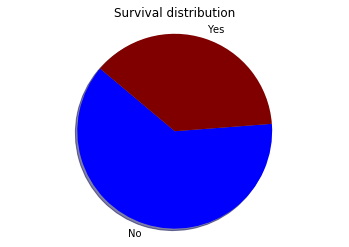

In [0]:
# Checking the survival rate distribution
# 
labels = ['No', 'Yes']
sizes = [215,130]
colors = ['blue', 'maroon']
plt.pie(sizes, labels=labels, colors=colors, shadow=True,startangle=140)
plt.axis('equal')
plt.title('Survival distribution')
plt.show()

 

> We observe from the above analyis that most people on board did not survive

>> Less than half the people on board survived.

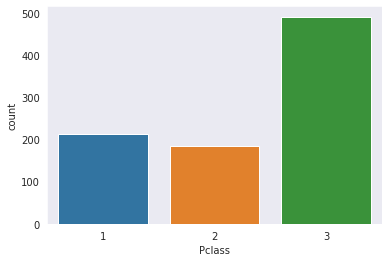

In [0]:
#  Checking the distribution of Pclass column
# 
sns.set_style('dark')
sns.countplot(x='Pclass',data=df2)

> From external data source, the 1st class cabin was very fancy compared to the 3rd class which explains the observation above that there was a big number of passengers in the 3rd class

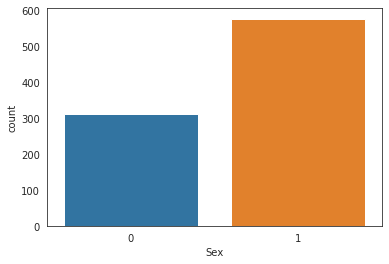

In [0]:
#  Checking the distribution of Sex column
# 
sns.set_style('white')
sns.countplot(x='Sex',data=df2)

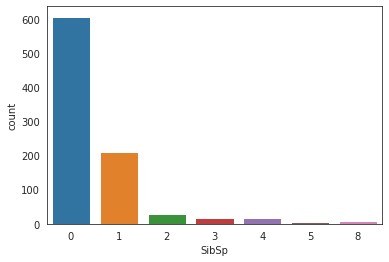

In [0]:
#  Visualizing the distribution of Sex column
# 
sns.set_style('white')
sns.countplot(x='SibSp',data=df2)

> The number of siblings / spouses aboard the Titanic decreased as the number increased.

>> 0 has the highest frequency which means that most the passengers did not have either siblings or spouses on board

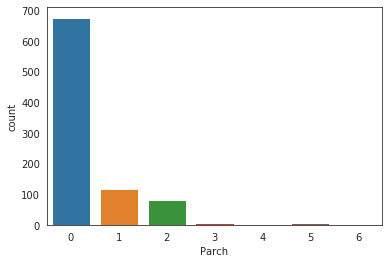

In [0]:
#  Visualizing the distribution of Sex column
# 
sns.set_style('white')
sns.countplot(x='Parch',data=df2)

> Number of parents / children aboard the Titanic reduces as the value increases

>> Most passengers di

> There were more male passengers on board compares=d to the ladies as shown in the distribution above.

## Age column imputation process

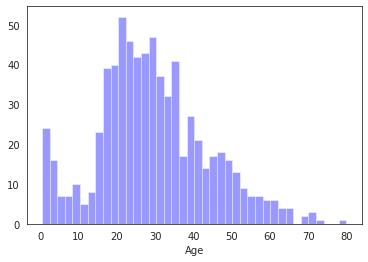

In [0]:
# Plotting the distribution of age column to see how age is distribututed before imputing
# with the right values
# We will workout the code with the dropna() clause to see how the data is distributed
# 
sns.distplot(df2['Age'].dropna(),kde=False,color='blue',bins=40)

> From the distribution above, data is skewed to the left which means that most people on board were of age of between 20-35

> This can be corrected by imputing with appropriate values to get a normal distribution of the data

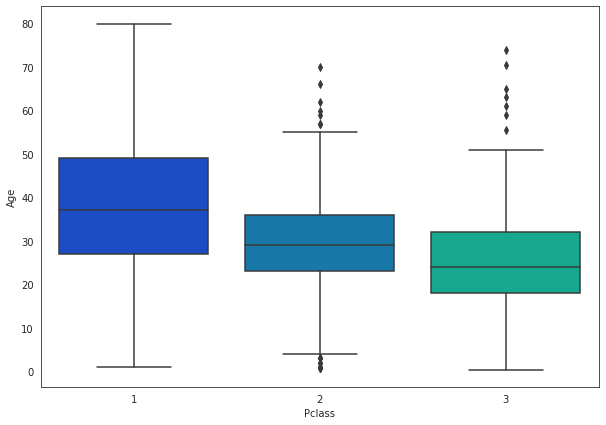

In [0]:
# Plotting a box plot to see the distribution of age in the different classes
# 
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass',y='Age',data=df2,palette='winter')

> The boxplot helps us visualize the age distribution in the various quantiles for the 3 classes

>> For class 1, the median age was around 37 years, 28 years for second class and 25 years for the passengers in the third class

>We therefore create a function to iterate through the 3 classes replacing the missing value with the appropriate value for that class

In [0]:
# Creating a fucntion to iterate through the 3 classes
# 
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 28

        else:
            return 25

    else:
        return Age
# Applying the function above
df2['Age'] = df2[['Age','Pclass']].apply(impute_age,axis=1) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


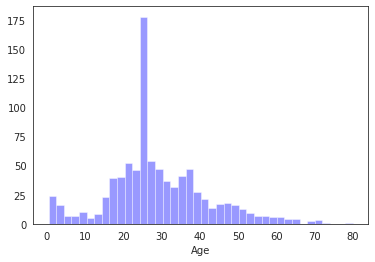

In [0]:
# Plotting the age column again to see the distribution after imputation
# 
sns.distplot(df2['Age'].dropna(),kde=False,color='blue',bins=40)

> The data is normally distributed after the replacing the missing values with te appropriate values

## b) Bivariate Analysis

0    549
1    340
Name: Survived, dtype: int64
1    577
0    312
Name: Sex, dtype: int64


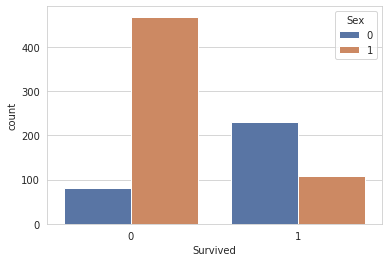

In [0]:
#  Comparing Survived column and Sex column to understand who survided more, either Male or Female
# 
# Doing value counts for Survived and Sex column
print(df2['Survived'].value_counts())
print(df2['Sex'].value_counts())
# 
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df2,palette='deep')

> Most male passengers did not survive the accident compared to the ladies who survived.

>> This could translate to many females being saved than men

0    549
1    340
Name: Survived, dtype: int64
3    491
1    214
2    184
Name: Pclass, dtype: int64


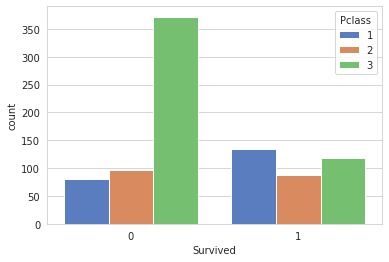

In [0]:
#  Comparing Survived column and Pclass column to understand who survided more,  and from which class
# 
# Doing value counts for Survived and Pclass column
print(df2['Survived'].value_counts())
print(df2['Pclass'].value_counts())
# 
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df2,palette='muted')

> Passengers from the 3 class died in high numbers followed by the 2nd and 1st class respectively in accordance to the plot above.

> Passengers in the 1st class survived most since evaculation for them was easy

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


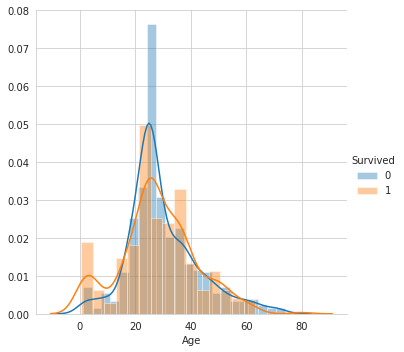

In [0]:
# Checking the survival rate based on age. Here we change the age group that survived most
# in the tragedy
# 
sns.FacetGrid(df2, hue='Survived',size=5).map(sns.distplot, 'Age').add_legend()

> Most passengers of age 20 - 30 did not survive the tragedy

> A few passengers survived across all the age groups

## c) Multivariate Analysis

In [0]:
#  Create a heatmap
# Finding the relations between the variables.
# Getting the correlation matrix
corr_matrix = df2.corr()
corr_matrix.describe()


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.032179,0.076755,0.026924,0.026021,0.149090,0.145019,0.122588
std,0.486760,0.457225,0.483150,0.456931,0.428105,0.433811,0.394515
min,-0.541585,-0.397224,-0.541585,-0.397224,-0.241573,-0.247508,-0.118593
25%,-0.195471,-0.159362,-0.183050,-0.207063,-0.088477,-0.125937,-0.069963
50%,-0.034040,0.043835,-0.116348,-0.055394,-0.034040,0.016824,-0.035866
75%,0.095910,0.104698,0.106250,0.024446,0.248099,0.248846,0.076252
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


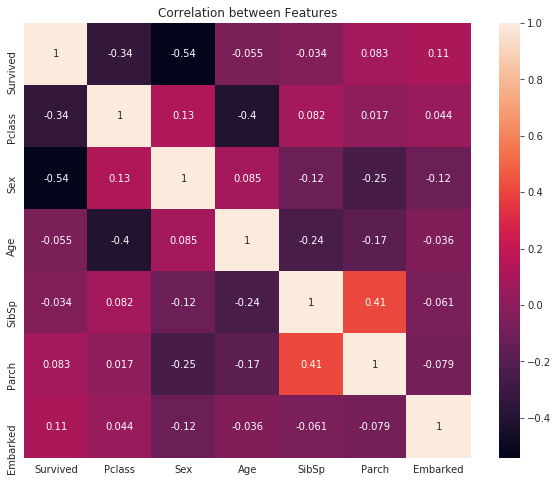

In [0]:
# Plotting a heatmap to visualize the correlation between different features
# 
plt.figure(figsize = (10, 8))
sns.heatmap(df2.corr(), annot = True) 
plt.title('Correlation between Features')
plt.show()

> The correlation value between the features was good enough in that  none of the features where highly correlated to the point of affecting the performance of our model

## 7. Implementing the Solution

> We start by creating a baseline model to be able to base our modelling in this in that we will use the model to compare with the rest of the models to be created.

>> We use Logistic Model as our baseline model.

> Logistic regression is the appropriate regression analysis to conduct when the dependent variable is binary. For our case, the target variable(Survived) is binary (0 = No, 1 = Yes)

## a) Logistic Regression Model

In [0]:
# Define our X and y variables as below:
# x is the independent variable
# y is the target variable(price)
# 
X = df2.drop(columns = ['Survived'], axis=1)
y = df2['Survived']
# 
# Splitting data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)
# 
# Standardising the X_train and the X_test to the same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Training the model
# 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# 
# Fitting the model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
# 
# Making predictions using the model above
# 
preds = logmodel.predict(X_test)
# 
# Getting the accuracy of our model
from sklearn.metrics import accuracy_score, r2_score,mean_absolute_error, mean_squared_error
import scipy.stats as stats
print("Logistic Reg. model is", accuracy_score(y_test,preds))

Logistic Reg. model is 0.7191011235955056


> Our baseline model is 72% accurate in making predictions.

> With this model, we can have other models to compare with this model to see if other models do better prediction

## b)  K-nearest neighbor (kNN) classifier 

> KNN algorithms use data and classify new data points based on similarity measures.

>> KNN Classifier  works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label

In [0]:
# Splitting the dataset into attributes and labels where X contains the independent features
# and y the dependent feature
# 
X = df2.iloc[:, 1:7 ].values
y = df2.iloc[:, 0].values
# 
# Splitting data into train and test
# The test data gives us a better idea as to how our algorithm performed during the testing phase
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# 
# Doing Feature Scaling before making any actual predictions so that all of them can be uniformly evaluated.
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Fitting the data
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
# Making predictions 
# 
y_pred_Knn = classifier.predict(X_test)
# 
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_Knn))
print(classification_report(y_test, y_pred_Knn))

[[93 15]
 [23 47]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       108
           1       0.76      0.67      0.71        70

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.79      0.78       178



> The confusion matrix indicates that the model is able to make 142 correct predictions and only 36 off predictions which is not badly off

> From the analysis above, we also observe that our model accuracy has improved from 72% (Baseline Model) to 79% for the KNN. 

> This means that KNN is a better classifier compared to Logistic Regression Model

In [0]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,0.0
1,1,1,0,38.0,1,0,1.0
2,1,3,0,26.0,0,0,0.0
3,1,1,0,35.0,1,0,0.0
4,0,3,1,35.0,0,0,0.0


**Performing LDA to improve the model performance**

In [0]:
# Defining the independent and dependent variable to be used 

D = df2.iloc[:, 1:7].values
y = df2.iloc[:, 0].values
# 
# Dividing the data to train and test

X_train, X_test, y_train, y_test = train_test_split(D, y, test_size=0.2, random_state=0)

# Performing feature scaling which is done on the independent variables to normalize the data to a particular range

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Performing Linear Discriminant Analysis(LDA)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
# 
# Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown below
# import the random forest library
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [0]:
# Evaluating the Performance
# We evaluate our model by getting  a confusion matrix and finding the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix )
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[91 14]
 [35 38]]
Accuracy0.7247191011235955


> The matrix shows that the model can do 129 correct predictiona and 50 off predictions.

> The model accuracy dropped to 72% but can still do well in making predictions

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [0]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

> Yes. The data provided was good enough to build a model and answer different questions in place

### b). Do we need other data to answer our question?

> More data could be made available if the case where more study needs to be done concerning same tragedy.

### c). Did we have the right question?

> The question was clear and understandable hence making analysis easy